# 激活函数tanh, sigmoid

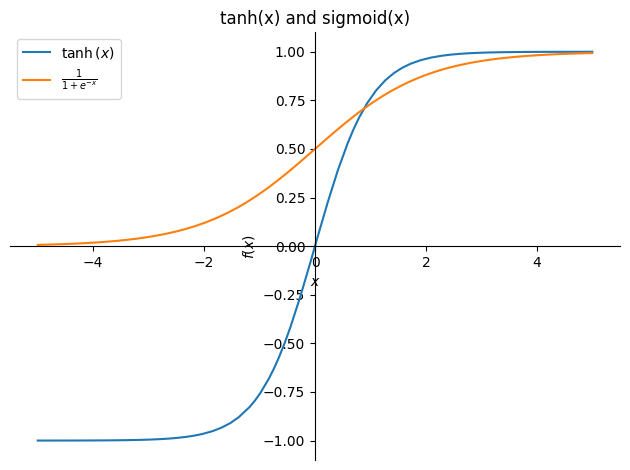

In [5]:
from sympy import *
from sympy.plotting import plot

x = symbols('x')
tanh_func = tanh(x)
sigmoid_func = 1 / (1 + exp(-x))

plot(tanh_func, sigmoid_func, (x, -5, 5), title="tanh(x) and sigmoid(x)", legend=True)


# 激活函数softmax

In [6]:
import numpy as np

def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)

softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

In [10]:
import numpy as np


print(np.exp(3)/(np.exp(3)+np.exp(9)))
print(np.exp(9)/(np.exp(3)+np.exp(9)))

0.0024726231566347743
0.9975273768433652


In [2]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 71.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 59.5 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3


# 数据准备

Matplotlib is building the font cache; this may take a moment.


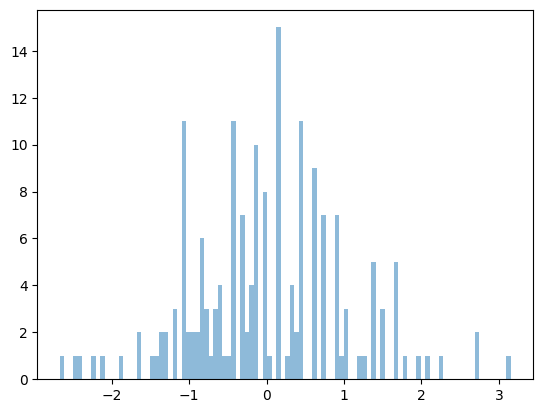

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

filename = 'wine_classification.csv'

with open(filename, 'r') as file:
    reader = csv.reader(file, delimiter=',')
    rows = [[float(v) if i else int(v) for (i, v) in enumerate(row)] for (index, row) in enumerate(reader) if index > 0]
    
    data = np.array(rows)
    np.random.shuffle(data)
    
    values = data[:,0]
    samples = data[:,1:]
    # print(values)
    # print(samples)

    one_hots = np.zeros((values.shape[0], int(np.max(values))))
    for i in range(values.shape[0]):
        one_hots[i, int(values[i] - 1)] = 1
        
    # print(one_hots)
    
    def stand(data):
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        z_scores = (data - mean) / std
        return z_scores
    
    samples = stand(samples)
    
    plt.hist(samples[:,3], bins=100, alpha=0.5)
    plt.show()

# 分类神经网络

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def stand(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    z_scores = (data - mean) / std
    return z_scores


filename = 'wine_classification.csv'
with open(filename, 'r') as file:
    reader = csv.reader(file, delimiter=',')
    
    data = []
    first = True
    for row in reader:
        if first:
            first = False
            continue

        data.append([float(value) for value in row])

data = np.array(data)
np.random.shuffle(data)

dataset_size = data.shape[0]

samples = data[:,1:]
samples = stand(samples)

results = [int(c) for c in data[:,0]]
one_hots = np.zeros((dataset_size, np.max(results)))
for i in range(dataset_size):
    one_hots[i, results[i]-1] = 1


# plt.hist(samples[:,1], bins=100, alpha=0.5, color='green', edgecolor='black')
# plt.show()
idx = int(0.9 * len(data))

train_x = samples[:idx]
train_y = one_hots[:idx]

validation_x = samples[idx:]
validation_y = one_hots[idx:]


def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

class SimpleNeuralNetwork:
    
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.rand(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.w2 = np.random.rand(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

        self.error_cost = []

    def forward(self, feature_set):
        # Phase 1
        self.z1 = np.dot(feature_set, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)

        # Phase 2
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, X, y, output, epoch):
        derr_dz2 = output - y
        dz2_dw2 = self.a1

        derr_w2 = np.dot(dz2_dw2.T, derr_dz2)
        derr_b2 = derr_dz2

        dz2_da1 = self.w2
        derr_da1 = np.dot(derr_dz2 , dz2_da1.T)
        da1_dz1 = sigmoid_der(self.z1)
        dz1_dw1 = X
        derr_w1 = np.dot(dz1_dw1.T, da1_dz1 * derr_da1)

        derr_b1 = derr_da1 * da1_dz1

        self.w1 -= lr * derr_w1
        self.b1 -= lr * derr_b1.sum(axis=0)

        self.w2 -= lr * derr_w2
        self.b2 -= lr * derr_b2.sum(axis=0)

        if epoch % 10000 == 0:
            loss = np.sum(-y * np.log(output))
            print(f'{epoch} loss: {loss}')
            self.error_cost.append(loss)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, epoch)

    def predict(self, X):
        return self.forward(X)

lr = 0.001
nn = SimpleNeuralNetwork(train_x.shape[1], 30, train_y.shape[1])
nn.train(train_x, train_y, epochs=500000)

output = nn.predict(validation_x)
print(output)
print(validation_y)
loss = np.sum(-validation_y * np.log(output))
print(f'loss {loss}')

0 loss: 256.0064884203506
10000 loss: 0.19785688339219293
20000 loss: 0.08585128836185589
30000 loss: 0.05306236178283249
40000 loss: 0.0378513768959987
50000 loss: 0.029198905586748067
60000 loss: 0.023662144610803258
70000 loss: 0.01983454529977128
80000 loss: 0.017039714626503735
90000 loss: 0.014914089818173704
100000 loss: 0.01324566579644305
110000 loss: 0.011902844209719834
120000 loss: 0.010799789765193427
130000 loss: 0.009878216509850756
140000 loss: 0.00909720282685954
150000 loss: 0.008427199415120785
160000 loss: 0.007846350750740638
170000 loss: 0.007338153469940319
180000 loss: 0.006889918498371465
190000 loss: 0.006491733199025087
200000 loss: 0.006135744023307247
210000 loss: 0.005815650082694281
220000 loss: 0.005526338811407483
230000 loss: 0.005263619375200626
240000 loss: 0.005024024598108759
250000 loss: 0.004804661743072302
260000 loss: 0.004603098668487091
270000 loss: 0.004417275965110661
280000 loss: 0.004245438421395834
290000 loss: 0.004086081040422208
30000